<a href="https://colab.research.google.com/github/tomcat472/Machine_Learning_2022/blob/main/Machine_Learning_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

Regression is one of the most widely used statistical tools.
(We have some set of features and we want to model how our observations that are associated with these features change as we change the values of the features.)
ဒီမှာက ရှင်းတယ် ကိုယ့်လက်ထဲမှာရှိတဲ့ data set ကို features အပိုင်းကနေမူတည်ပြီး ကိုယ်ရချင်တဲ့ target ကိုတွက်ထုတ်မှာဖြစ်ပါတယ်။

ပြီးတော့အရေးကြီးတာက observation နဲ့ prediction ကြားက ခြားနားချက်ကို error or residual လို့ခေါ်ပါတယ်။ fitted လိုင်းတွေဆိုပြီး ကိုယ်လုပ်တဲ့ prediction နဲ့ ကိုယ့်ဆီမှာရှိတဲ့ မူရင်းတန်ဘိုးကြားက ခြားနားချက်ကို လုပ်ပြီး ကိုယ်လုပ်ထားတာ တလွဲဖြစ်မဖြစ်ပြန်စစ်လို့ရပါတယ်။
ကျန်တာတွေက တွက်ရင်းနဲ့ အသေးစိတ်ပြန်ရှင်းပြပေးပါမယ်။

In [1]:
# စတွက်တော့မှာ ဆိုရင် ဒီအဆင့်တွေအတိုင်း ပုံမှန်ဆိုရင် တွက်ပါတယ်။
# exploring our data and visualization
# train and create a linear regression model
# evaluate our model
# make prediction
# calculate RMSE

In [2]:
# python libraries များအား import လုပ်ခြင်း
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
# မိမိအသုံးပြုမည့် data set အားဖွင့်ခြင်း
# ကျနော်က google colab ကနေသုံးတာ ဆိုတော့ google drive က file ကိုယူသုံးမှာ ဖြစ်ပါတယ်။
# github မှာတော့ file တင်ပေးထားပါတယ်။
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# dataset အားဖွင့်ခြင်း
df=pd.read_csv('/content/drive/MyDrive/Notes-master/home_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
# colums များအား ကြည့်ခြင်း
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
# data types များနဲ့ null ဖြစ်/မဖြစ်အားကြည့်ခြင်း
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
# summary statistics အားကြည့်ခြင်း
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Text(0, 0.5, 'price of house')

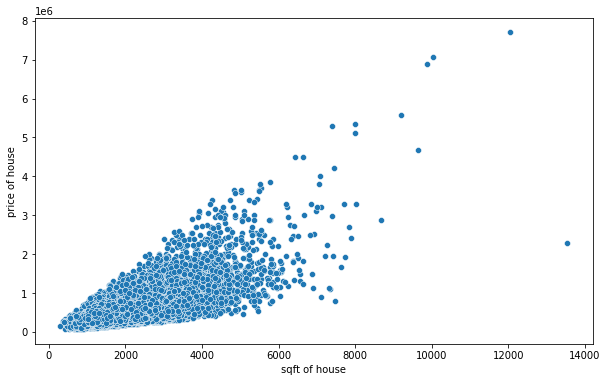

In [8]:
# sqft_living နဲ့ price ကြားဆက်နွယ်ချက်အား plot ပြုလုပ်ခြင်း
plt.figure(figsize=(10,6))
sns.scatterplot(df.sqft_living,df.price)
plt.xlabel('sqft of house')
plt.ylabel('price of house')

<Figure size 720x432 with 0 Axes>

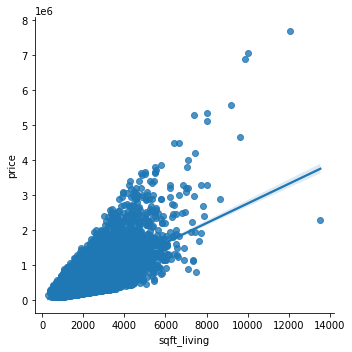

In [9]:
# regression plot ပြုလုပ်ခြင်း
plt.figure(figsize=(10,6))
sns.lmplot('sqft_living','price',data=df)

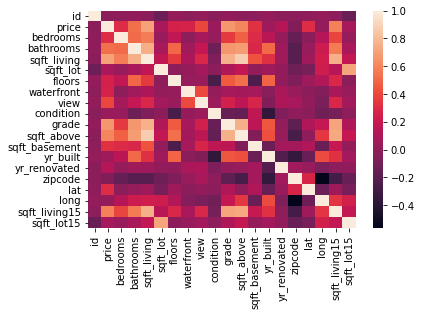

In [10]:
# heat map ပြုလုပ်ခြင်း
sns.heatmap(df.corr())

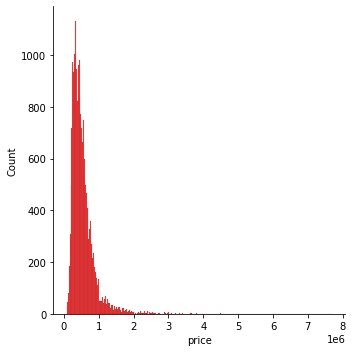

In [11]:
sns.displot(df['price'],color='red')

In [12]:
# linear regression ကို scikit-learn သုံးပြီးတွက်ပါမယ်။
# အပေါ်ကအဆင့်တွေက ကိုယ့်ရဲ့ data ကြားက အချင်းချင်း ဆက်နွယ်ချက်တွေ
# ကို ကြည့်ပြီး လိုအပ်တာတွေကို ပြင်ဆင်တဲ့အဆင့်ဖြစ်ပါတယ်။

In [13]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [14]:
# ဒီကောင်ကိုတွက်မယ်ဆိုရင် features နဲ့ target တွေကို အရင်သတ်မှတ်ပေးရပါမယ်။
# သတ်မှတ်ရာမှာ features columns တွေကို 2D array နဲ့ရေးပြီး target column ကိုတော့ 1D array နဲ့ရေးပါတယ်။
# features columns ကို X လို့သတ်မှတ်ပြီး target column ကို Y လို့သတ်မှတ်ပါတယ်။
# feature column က (၁)ခုကနေ အများထိသတ်မှတ်ပေးလို့ရပြီး target ကတော့ (၁)ခုပဲထားလို့ရပါတယ်။
# ကျနော်တို့တွက်မှာက အိပ်ခန်းတွေ၊ ရေချိုးခန်းတွေအဲ့လို columns တွေနဲ့ price နဲ့ဆက်နွယ်ချက်ကို အခြေခံပြီးတွက်ထုတ်မှာဖြစ်တယ်။

In [15]:
X=df[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode']]
y=df.price #df['price'] လို့လဲရေးလို့ရပါတယ်။
# 2D array ရေးမယ်ဆိုရင် [[]] ကြားထဲထည့်ပြီးရေးတာဖြစ်ပါတယ်။
# 2D array က table နဲ့ဆင်ပါတယ်။ 1D ကျတော့ column လို့သဘောထားလို့ရပါတယ်။
# ဒီမှာသုံးမယ့် သဘောတရားက matrics မှာသုံးတာနဲ့တူပါတယ်။

In [16]:
print(X.shape,y.shape) #X နဲ့ y တို့၏ dimension ကြည့်ချင်း
# (x,y) x,y တန်ဖိုး ၂ ခုပါတာက 2D array ဖြစ်ပါတယ်။ x က row, y က column ဖြစ်ပါတယ်။

(21613, 14) (21613,)


### Train Test Split

In [17]:
# machine learning ကို သုံးတော့မယ်ဆိုရင် ကျနော်တို့ရဲ့ dataset ကို train နဲ့ test ဆိုပြီး ၂ စုခွဲပါတယ်။
# train လုပ်မယ့် result ရတာနဲ့ test နဲ့ပြန်တိုက်ဆိုင် စစ်ဆေးပြီး ကိုယ်လုပ်ထားတာ ဘယ်လောက်တိကျမှုရှိလဲဆိုတာကို
# ကြည့်မှာကြောင့်မို့ လုပ်တာဖြစ်ပါတယ်။

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# test size 0.3 ဆိုတာက data set ထဲက data တွေရဲ့ 30 % ကိုဆိုလိုတာ ဖြစ်ပါတယ်။
# random state ကတော့ random ယူပြီးသွားတဲ့ပုံစံဖြစ်ပါတယ်။ zero ကနေစလို့ positive integer တန်ဖိုးတွေကို အသုံးပြုပါတယ်။

In [20]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(15129, 14) (15129,)
(6484, 14) (6484,)


In [21]:
# linear model
from sklearn.linear_model import LinearRegression

In [22]:
# linear regression class ကို instanciate ပြုလုပ်ခြင်း
model=LinearRegression()

In [23]:
#ပထမဆုံး train data တွေကို fit လုပ်မယ်။
model.fit(X_train,y_train)

LinearRegression()

In [24]:
# ပြီးရင် predict လုပ်မယ်။
prediction=model.predict(X_test)
prediction

array([ 515450.8199654 ,  676697.3522652 , 1224740.65725206, ...,
        290934.90132614,  857629.93376655,  489104.29215129])

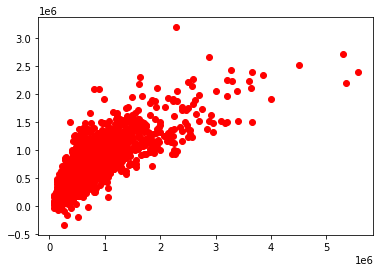

In [25]:
# X_test ကို predict လုပ်ထားတဲ့ value နဲ့ y test ကိုနှိုင်းယှဉ်မယ်။
plt.scatter(y_test,prediction,color='r')

In [26]:
model.coef_

array([-3.83252249e+04,  4.42712946e+04,  1.15576535e+02, -2.74679546e-01,
        2.50214190e+04,  5.36410502e+05,  4.61211982e+04,  1.43611609e+04,
        1.22222290e+05,  5.60115850e+01,  5.95649505e+01, -3.55362122e+03,
        1.17216864e+01, -3.10249018e+01])

In [27]:
df_coef=pd.DataFrame(model.coef_,X.columns,columns=['Coefficent Value'])
df_coef
# coefficent ဆိုတာ 1 unit အလိုက်တန်ဘိုးဖြစ်ပတယ်၊

,Coefficent Value
bedrooms,-38325.224919
bathrooms,44271.294560
sqft_living,115.576535
sqft_lot,-0.274680
floors,25021.418995
waterfront,536410.501941
view,46121.198225
condition,14361.160938
grade,122222.290380
sqft_above,56.011585


In [28]:
model.intercept_ # ဒီကောင်က မျဉ်းဖြတ်သွားတဲ့တန်ဘိုး

9230862.378876433

In [29]:
# Linear Regression က ငယ်ငယ်က linear equation formula ဖြစ်တဲ့
# y=mx+b က နေတွက်တဲ့ algorithm ဖြစ်ပြီး coefficent က m ဖြစ်ပြီး b က interception ဖြစ်တယ်။
# x ကျတော့ ကိုယ်ရချင်တဲ့ တန်ဘိုးတွေဖြစ်တယ်။
# ကျနော်တို့က x တန်ဘိုးပဲ သိတဲ့အတွက် x က linear equation မှာချလိုက်ရင် m နဲ့ b တန်ဘိုးရခဲ့မှာဖြစ်တယ်။
# m နဲ့ b တန်ဘိုးရရင် ကိုယ်လိုချင်တဲ့ prediction ရပြီလို့ သတ်မှတ်လို့ရပါတယ်။

In [30]:
# ကိုယ့်ရဲ့ model မှာ error ဘယ်လောက်ရှိလဲ သိချင်ရင် RMSE ဆိုတဲ့ (root mean square error)
# တန်ဘိုးကိုရှာပေးရပါတယ်။

### RMSE (root mean squared error)

RMSE ဆိုတာ  actual နဲ့ prediction ကြားက ကွာဝေးတဲ့အကွာအဝေးဖြစ်ပါတယ်။
အဲ့တန်ဖိုးနည်းလေလေ ကိုယ်လုပ်ထားတာ တိကျလေလေလို့ပဲမှတ်လို့ရပါတယ်။

In [31]:
from sklearn import metrics

In [32]:
mse=metrics.mean_squared_error(y_test,prediction)

In [33]:
RMSE=np.sqrt(mse)
RMSE

224560.199930769

In [34]:
# နောက်ထပ် model ပြုလုပ်ပြီး ပထမနဲ့ ဒုတိယ ဘယ်ဟာ error များလဲ ရှာရအောင်
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [35]:
model2=LinearRegression()

In [36]:
model2.fit(X_train,y_train)

LinearRegression()

In [37]:
prediction2=model2.predict(X_test)
prediction2

array([229802.21057728, 774461.83816659, 729756.14521333, ...,
       305416.77601125, 304644.28130002, 343694.73728572])

In [38]:
print(prediction[0])
print(prediction2[0])

515450.8199654035
229802.2105772756


In [39]:
mse2=metrics.mean_squared_error(y_test,prediction2)
RMSE2=np.sqrt(mse2)
RMSE2
# ရလာတဲ့ RMSE တန်ဘိုးနဲ့ အရင်ကရထားတဲ့ တန်ဖိုးနဲ့နှိုင်းယှဉ်ကြည့်လို့ရပါတယ်။

220417.68632558157